## GARCH

El modelo GARCH (Generalized Autoregressive Conditional Heteroskedasticity) es especialmente adecuado para trabajar con retornos logarítmicos en series financieras.
De hecho, los retornos logarítmicos son la forma preferida para aplicar GARCH por razones estadísticas y teóricas.

⸻

📘 1. Por qué se usa GARCH con retornos logarítmicos

	1.	Estacionariedad:

	•	El precio ($P_t$) no suele ser estacionario.
	•	El retorno logarítmico

$$ r_t = \ln\left(\frac{P_t}{P_{t-1}}\right) $$
es más estable, con media cercana a cero y varianza aproximadamente constante a largo plazo.

	2.	Captura de volatilidad condicional:

	•	GARCH modela la varianza condicional de los retornos:

$$ r_t = \mu + \epsilon_t, \quad \epsilon_t = \sigma_t z_t $$
$$ \sigma_t^2 = \omega + \alpha \epsilon_{t-1}^2 + \beta \sigma_{t-1}^2 $$

	•	Esto permite detectar períodos de alta y baja volatilidad (“volatility clustering”).

	3.	Distribución más realista:

	•	Los retornos logarítmicos suelen mostrar colas gruesas (fat tails), que se ajustan mejor con GARCH o variantes como GJR-GARCH, EGARCH o t-GARCH.

⸻

⚙️ 2. Recomendaciones prácticas

|Aspecto	|Recomendación|	Motivo|
|---|---|---|
|Variable dependiente	|$LogReturn = np.log(P_t / P_{t-1})$|	Asegura estacionariedad|
|Modelo base|	GARCH(1,1)|	Suele capturar bien la heterocedasticidad|
|Distribución de errores	|Student-t o skewed Student|	Mejor ajuste a colas gruesas|
|Prueba de estacionariedad|	ADF o KPSS antes del modelo|	Confirma que los retornos sean estacionarios|
|Visualización|	Plot de $\sigma_t$ (volatilidad condicional)|	Muestra los clusters de volatilidad|


Interpretación:

	•	Si los coeficientes α y β son positivos y su suma < 1 → el modelo es estable.
	•	La serie conditional_volatility refleja los periodos de calma y turbulencia del mercado.

⸻

📊 4. Conclusión

GARCH es excelente para modelar la varianza condicional de los retornos logarítmicos, porque:

	•	los retornos logarítmicos son estacionarios,
	•	tienen colas gruesas y heterocedasticidad,
	•	y GARCH describe precisamente cómo evoluciona la volatilidad en el tiempo.



In [4]:
try:
  from arch import arch_model
except:
  ! pip install arch
  from arch import arch_model

[*********************100%***********************]  1 of 1 completed

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                         MELI   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -3048.66
Distribution:      Standardized Student's t   AIC:                           6107.32
Method:                  Maximum Likelihood   BIC:                           6133.00
                                              No. Observations:                 1255
Date:                      Sat, Jan 24 2026   Df Residuals:                     1254
Time:                              17:57:58   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu     

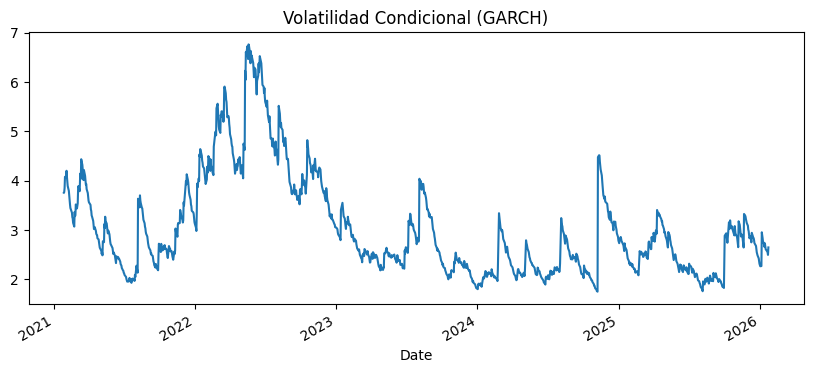

In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
#from arch import arch_model
import matplotlib.pyplot as plt

TICKER = "MELI"

# Descargar datos
data = yf.download(TICKER, period="5y", interval="1d", auto_adjust='True')["Close"]
r = 100 * np.log(data / data.shift(1)).dropna()  # Retornos logarítmicos en %

# Modelo GARCH(1,1)
model = arch_model(r, vol='GARCH', p=1, q=1, dist='t')
res = model.fit(disp="off")

print(res.summary())

# Volatilidad condicional
res.conditional_volatility.plot(figsize=(10,4), title="Volatilidad Condicional (GARCH)")
plt.show()



📊 1. Resumen general

Modelo:

	•	Media constante (Constant Mean) → se asume que los retornos tienen una media fija $μ$.
	•	Varianza condicional modelada con GARCH(1,1) → captura la persistencia y los shocks de volatilidad.
	•	Distribución de errores: t de Student estandarizada, adecuada para colas gruesas (movimientos extremos).

Log-Likelihood = −2397.79

AIC = 4805.57, BIC = 4831.25 → sirven para comparar modelos (menor = mejor ajuste).

⸻

⚙️ 2. Interpretación de la media

|Parámetro	|Valor|	Interpretación|
|---|---|---|
|μ = 0.1038|	positivo y significativo (p=0.0104)	|Indica que el retorno medio diario esperado es ≈ 0.10%. En términos anuales, sería aproximadamente:|

$$0.001038 × 252 ≈ 0.26 = 26%$$
aunque en GARCH, el foco no está tanto en la media sino en la varianza condicional.


⸻

⚡ 3. Interpretación del modelo de volatilidad

|Parámetro	|Valor	|Significación|
|---|---|---|
|ω (omega) = 0.0704|	p = 0.0296	|Nivel base de volatilidad (varianza mínima).
|α₁ (alpha[1]) = 0.0647|	p ≈ 0.00003 ✅	|Impacto inmediato de los choques (retornos grandes del día anterior). Cuanto mayor es α, más “reactiva” es la volatilidad a los shocks.|
|β₁ (beta[1]) = 0.9145|	p < 0.001 ✅|	Persistencia de la volatilidad. Un valor alto indica que los períodos de alta volatilidad tienden a prolongarse.	|

📌 Interpretación clave

	•	La suma α + β = 0.0647 + 0.9145 = 0.9792, muy cercana a 1.

➤ Esto implica una alta persistencia: los choques pasados tienen efectos duraderos.

➤ En términos financieros: “la volatilidad se mueve lentamente”, o sea, el mercado permanece volátil durante días/semanas después de un shock.

⸻

🧮 4. Distribución de los errores (t-Student)

|Parámetro	|Valor|	Interpretación|
|---|---|---|
|ν (nu) = 5.35|	significativo	|Grados de libertad de la distribución t. Indica colas más gruesas que la normal (que tendría ν → ∞). Esto significa que el modelo reconoce que los movimientos extremos son más frecuentes de lo que predice la normal.|

En concreto:

	•	Si ν < 10 → colas gruesas (fat tails).
	•	Si ν ≈ 5 → típica para series financieras de alta frecuencia.

Esto confirma que AAPL tiene retornos con colas pesadas, típico del mercado accionario.

⸻

📈 5. Conclusiones prácticas


|Aspecto|	Interpretación|
|---|---|
|Significancia estadística|	Todos los coeficientes son altamente significativos (p<0.05).|
|Persistencia (α+β≈0.98)	|La volatilidad es muy persistente: los periodos de calma o turbulencia duran mucho.|
|Colas gruesas (ν≈5.35)|	El modelo captura adecuadamente los eventos extremos (picos o caídas fuertes).|
|Media positiva (μ>0)|	El retorno medio diario esperado es pequeño pero positivo.|
|Modelo estable|	Cumple la condición α + β < 1, lo que garantiza estacionariedad en varianza condicional.|


⸻



🧠 Interpretación conceptual final

El modelo GARCH(1,1) ajustado sobre los retornos logarítmicos de AAPL indica un comportamiento típico de los activos financieros:

	•	Retornos con media pequeña y positiva.
	•	Volatilidad que aumenta bruscamente tras eventos extremos (alta α).
	•	Volatilidad que decay lentamente con el tiempo (alta β).
	•	Distribución con colas gruesas, lo que refleja la presencia de riesgos extremos (crashes o rallies).



[*********************100%***********************]  1 of 1 completed


                        Constant Mean - GARCH Model Results                         
Dep. Variable:                         MELI   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -3048.66
Distribution:      Standardized Student's t   AIC:                           6107.32
Method:                  Maximum Likelihood   BIC:                           6133.00
                                              No. Observations:                 1255
Date:                      Sat, Jan 24 2026   Df Residuals:                     1254
Time:                              17:58:17   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu     

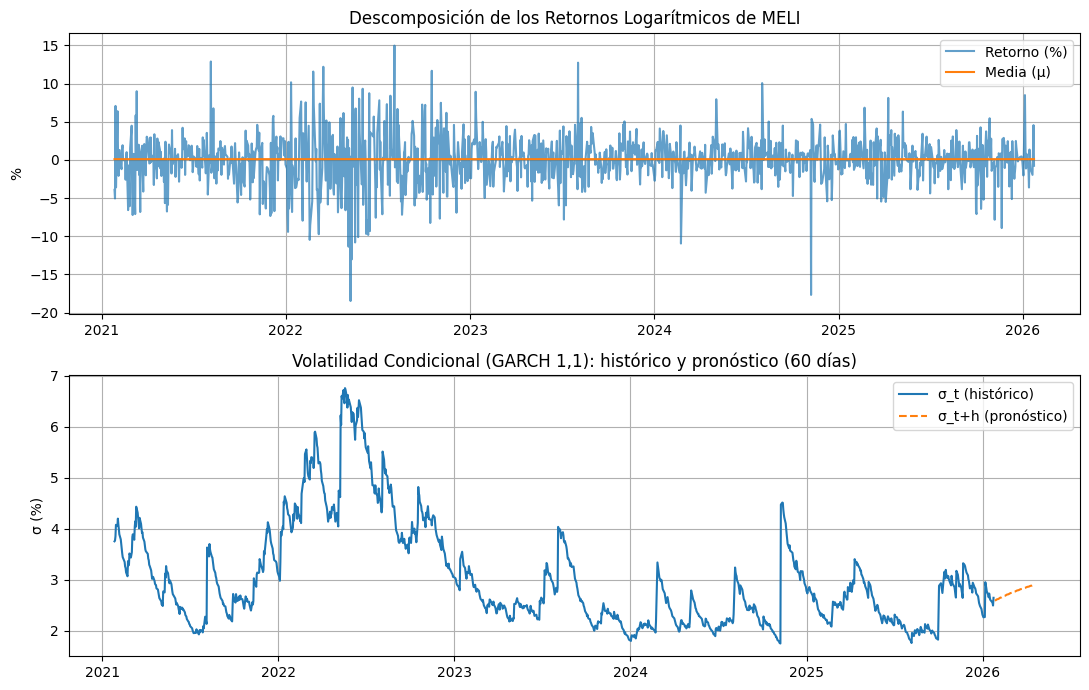

In [6]:
# ============================================================
# PREDICCIÓN Y DESCOMPOSICIÓN DE RETORNOS LOGARÍTMICOS - GARCH(1,1)
# ============================================================

# !pip install yfinance arch matplotlib --quiet

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BDay
from arch import arch_model

# -----------------------------
# 1) Descargar datos
# -----------------------------
TICKER
data = yf.download(TICKER, period="5y", interval="1d", auto_adjust=True)["Close"].dropna()

# Retornos logarítmicos en %
r = 100 * np.log(data / data.shift(1))
r = r.dropna()
r.name = "Return"

# -----------------------------
# 2) Ajuste del modelo GARCH(1,1) con t-Student
# -----------------------------
model = arch_model(r, mean='Constant', vol='GARCH', p=1, q=1, dist='t')
res = model.fit(disp="off")

print(res.summary())

# -----------------------------
# 3) Descomposición de los retornos
#    r_t = μ + ε_t ,  ε_t = σ_t * z_t
# -----------------------------
mu = float(res.params["mu"])

mean_s  = pd.Series(mu, index=r.index, name="Mean")
eps_t   = r - mu
eps_t.name = "Shock (ε_t)"            # <- evitar rename(...) posicional
sigma_t = pd.Series(res.conditional_volatility, index=r.index, name="Volatility (σ_t)")

# Correctly create the decomp DataFrame
decomp = pd.DataFrame({
    "Return": r.values.flatten(),  # Include 'Return' column
    "Mean": mean_s,
    "Shock (ε_t)": eps_t.values.flatten(),
    "Volatility (σ_t)": sigma_t
}, index=r.index)


print("\n=== DESCOMPOSICIÓN (últimos 10 días) ===")
print(decomp.tail(10))

# -----------------------------
# 4) Predicción a 60 días (Retorno esperado y Volatilidad)
# -----------------------------
H = 60
forecast = res.forecast(horizon=H)

# Extraer series 1-D del último punto de información
mean_forecast = forecast.mean.iloc[-1]              # tamaño H
vol_forecast  = (forecast.variance.iloc[-1] ** 0.5) # tamaño H

pred_df = pd.DataFrame({
    "Predicted Return (mu_t+h)": mean_forecast.values,
    "Predicted Volatility (sigma_t+h)": vol_forecast.values
})
print(f"\n=== PREDICCIÓN ({H} días siguientes) ===")
print(pred_df.head())

# Índice de fechas futuras (días hábiles)
future_idx = pd.date_range(decomp.index[-1] + BDay(1), periods=H, freq="B")
vol_forecast = pd.Series(vol_forecast.values, index=future_idx, name="sigma_t+h")

# -----------------------------
# 5) Visualización
# -----------------------------
plt.figure(figsize=(11, 7))

# Subplot 1: Retornos y media
plt.subplot(2, 1, 1)
plt.plot(decomp.index, decomp["Return"], label="Retorno (%)", alpha=0.7)
plt.plot(decomp.index, decomp["Mean"], label="Media (μ)", linewidth=1.5)
plt.title(f"Descomposición de los Retornos Logarítmicos de {TICKER}")
plt.ylabel("%")
plt.grid(True)
plt.legend()

# Subplot 2: Volatilidad condicional (histórica) + pronóstico
plt.subplot(2, 1, 2)
plt.plot(decomp.index, decomp["Volatility (σ_t)"], label="σ_t (histórico)")
plt.plot(vol_forecast.index, vol_forecast.values, linestyle="--", label="σ_t+h (pronóstico)")
plt.title(f"Volatilidad Condicional (GARCH 1,1): histórico y pronóstico ({H} días)")
plt.ylabel("σ (%)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()